In [ ]:
skeletons = skeletons
n=len(skeletons)
plt.ion()
for i in range(n):
    plt.figure()
    skeleton=skeletons[i].reshape(23,3)
    head=np.add(skeleton[0],skeleton[1])/2
    ax = plt.axes(projection='3d')
    for bone in bone_list:
        ax.plot3D([skeleton[bone[0]][2],skeleton[bone[1]][2]], [skeleton[bone[0]][0], skeleton[bone[1]][0]],[skeleton[bone[0]][1], skeleton[bone[1]][1]], 'r')
    plt.show()
    break

In [3]:
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import numpy as np
import torch
from data_loader import TANG
from utils import *

device=torch.device('cuda:0')
sequence_length = 200

dataset=TANG(seq_len=sequence_length, dataset_location='data/', normalize=False)

Loading the dataset...
Loading file tang.pickle


In [ ]:
moves, uid, suid = dataset.__getitem__(1000)
moves = moves.numpy()
#print(moves)
mind = np.ones(3)*1e5
maxd = np.zeros(3)
def get_skeletons(skeletons, bone, dims=3):
    """
    Create a line using a random walk algorithm.

    Parameters
    ----------
    length : int
        The number of points of the line.
    dims : int
        The number of dimensions of the line.
    """
    length = len(skeletons)
    line_data = np.zeros((dims, 2*length))
    for i,skeleton in enumerate(skeletons):
        i0, i1= 2*i, 2*i+1
        for k in range(3):
            maxd[k]=max(maxd[k],skeleton[bone[0]][k])
            mind[k]=min(mind[k],skeleton[bone[0]][k])
        line_data[:,i0]=np.array([skeleton[bone[0]][2],skeleton[bone[0]][0],skeleton[bone[0]][1]]).transpose()
        line_data[:,i1]=np.array([skeleton[bone[1]][2],skeleton[bone[1]][0],skeleton[bone[1]][1]]).transpose()
    return line_data

def update_lines(num, dataLines, lines):
    for line, data in zip(lines, dataLines):
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_data(data[0:2, 2*num:(2*num+2)])
        line.set_3d_properties(data[2, 2*num:(2*num+2)])
    return lines

skeletons = moves.reshape((len(moves),23,3))
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

data = [get_skeletons(skeletons, bone, 3) for bone in bone_list]
print(data[0].shape)
lines = [ax.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1])[0] for dat in data]
# Setting the axes properties
ax.set_xlim3d([mind[2], maxd[2]])
ax.set_xlabel('X')

ax.set_ylim3d([mind[0], maxd[0]])
ax.set_ylabel('Y')

ax.set_zlim3d([mind[1], maxd[1]])
ax.set_zlabel('Z')

ax.set_title('3D Test')

# Creating the Animation object
line_ani = animation.FuncAnimation(
    fig, update_lines, sequence_length, fargs=(data, lines), interval=50)

plt.show()

<IPython.core.display.Javascript object>


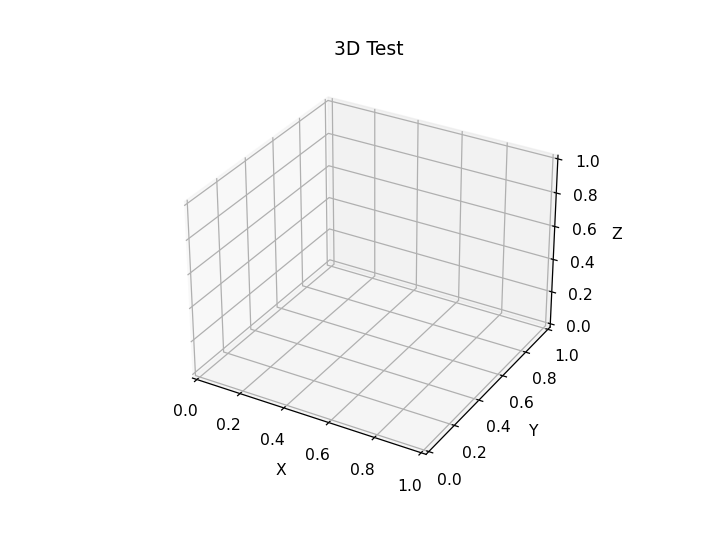

(3, 25)


In [4]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Fixing random state for reproducibility
np.random.seed(19680801)


def gen_rand_line(length, dims=2):
    """
    Create a line using a random walk algorithm.

    Parameters
    ----------
    length : int
        The number of points of the line.
    dims : int
        The number of dimensions of the line.
    """
    line_data = np.empty((dims, length))
    line_data[:, 0] = np.random.rand(dims)
    for index in range(1, length):
        # scaling the random numbers by 0.1 so
        # movement is small compared to position.
        # subtraction by 0.5 is to change the range to [-0.5, 0.5]
        # to allow a line to move backwards.
        step = (np.random.rand(dims) - 0.5) * 0.1
        line_data[:, index] = line_data[:, index - 1] + step
    return line_data


def update_lines(num, dataLines, lines):
    for line, data in zip(lines, dataLines):
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_data(data[0:2, :num])
        line.set_3d_properties(data[2, :num])
    return lines


# Attaching 3D axis to the figure
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

# Fifty lines of random 3-D lines
data = [gen_rand_line(25, 3) for index in range(50)]
print(data[0].shape)
# Creating fifty line objects.
# NOTE: Can't pass empty arrays into 3d version of plot()
lines = [ax.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1])[0] for dat in data]

# Setting the axes properties
ax.set_xlim3d([0.0, 1.0])
ax.set_xlabel('X')

ax.set_ylim3d([0.0, 1.0])
ax.set_ylabel('Y')

ax.set_zlim3d([0.0, 1.0])
ax.set_zlabel('Z')

ax.set_title('3D Test')

# Creating the Animation object
line_ani = animation.FuncAnimation(
    fig, update_lines, 25, fargs=(data, lines), interval=50)

plt.show()

<IPython.core.display.Javascript object>


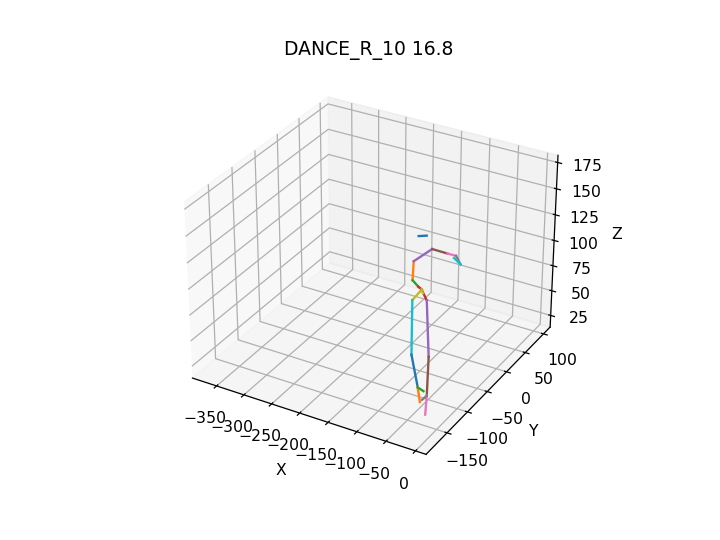

420 DANCE_R_10 torch.Size([200, 69]) torch.Size([200, 16])


In [39]:
moves, music, uid, suid = dataset.__getitem__(81080)
mind = np.ones(3)*1e5
maxd = np.zeros(3)
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation as animation
def get_skeletons(skeletons, bone, dims=3):
    """
    Create a line using a random walk algorithm.
    Parameters
    ----------
    length : int
        The number of points of the line.
    dims : int
        The number of dimensions of the line.
    """
    length = len(skeletons)
    line_data = np.zeros((dims, 2*length))
    for i,skeleton in enumerate(skeletons):
        i0, i1= 2*i, 2*i+1
        for k in range(3):
            maxd[k]=max(maxd[k],skeleton[bone[0]][k])
            mind[k]=min(mind[k],skeleton[bone[0]][k])
        line_data[:,i0]=np.array([skeleton[bone[0]][2],skeleton[bone[0]][0],skeleton[bone[0]][1]]).transpose()
        line_data[:,i1]=np.array([skeleton[bone[1]][2],skeleton[bone[1]][0],skeleton[bone[1]][1]]).transpose()
    return line_data
                                  
def update_lines(num, dataLines, lines):
    for line, data in zip(lines, dataLines):
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_data(data[0:2, 2*num:(2*num+2)])
        line.set_3d_properties(data[2, 2*num:(2*num+2)])
    return lines
                                  
skeletons = moves.reshape((len(moves),23,3))
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
data = [get_skeletons(skeletons, bone, 3) for bone in bone_list]
print(uid, dataset.names[suid], moves.shape, music.shape)
lines = [ax.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1])[0] for dat in data]
# Setting the axes properties
ax.set_xlim3d([mind[2], maxd[2]])
ax.set_xlabel('X')
ax.set_ylim3d([mind[0], maxd[0]])
ax.set_ylabel('Y')
ax.set_zlim3d([mind[1], maxd[1]])
ax.set_zlabel('Z')
ax.set_title(dataset.names[suid]+' '+str(uid/25))
# Creating the Animation object
line_ani = animation.FuncAnimation(
    fig, update_lines, sequence_length, fargs=(data, lines), interval=40)
Writer = animation.writers['ffmpeg']
writer = Writer(fps=25, metadata=dict(artist='Me'), bitrate=1800)
line_ani.save('im.gif', writer=writer)
plt.show()

In [40]:
import pickle
with open('trained_models/model12_10:27PM.pickle', 'rb') as f:
    model = pickle.load(f)

In [57]:
sequence_length = 100

dataset=TANG(seq_len=sequence_length, dataset_location='data/', normalize=False)

89104

In [74]:
moves, music, uid, suid = dataset.__getitem__(15000)
moves=moves.unsqueeze(axis=0)
music=music.unsqueeze(axis=0)
mean = music.mean(dim=(0,1))
std = music.std(dim=(0,1))
for i in range(16):
    if std[i] == 0:
        std[i] = 1 
        #print(mean,std)
music = (music-mean)/std
moves = (moves-moves.mean(dim=(0,1)))/moves.std(dim=(0,1)) 
music = music.to(device)
moves = moves.to(device)
inv_idx = torch.arange(sequence_length - 1, -1, -1).long()
criterion = torch.nn.MSELoss()
_,output = model(moves)
print(criterion(output, music[:, inv_idx, :]))
minx = 100
mini = 0
for i,musicx in enumerate(dataset.musics):
    musicx = musicx.type(torch.FloatTensor)
    musicx = musicx.unsqueeze(axis=0)
    mean = musicx.mean(dim=(0,1))
    std = musicx.std(dim=(0,1))
    for i in range(16):
        if std[i] == 0:
            std[i] = 1 
    musicx = (musicx-mean)/std
    musicx = musicx.to(device)
    if minx>criterion(output, musicx[:, inv_idx, :]):
        minx = criterion(output, musicx[:, inv_idx, :])
        mini=i
print(mini, minx)   
_,__, uidx, suidx =dataset.__getitem__(mini)
print(dataset.names[suid],dataset.names[suidx])

tensor(0.9768, device='cuda:0', grad_fn=<MseLossBackward>)
15 tensor(0.9049, device='cuda:0', grad_fn=<MseLossBackward>)
DANCE_C_1 DANCE_W_5


In [73]:
_,__, uidx, suidx =dataset.__getitem__(mini)
print(dataset.names[suid],dataset.names[suidx])

DANCE_R_10 DANCE_W_5


In [ ]:
import torch
device = torch.device('cuda:3' if torch.cuda.is_available() else 'cpu')

In [ ]:
from tqdm import trange
from time import sleep
t = trange(100, desc='Bar desc', leave=True)
for i in t:
    t.set_description("Bar desc (file %i)" % i)
    t.refresh() # to show immediately the update
    sleep(0.01)

In [ ]:
import os
import librosa
series_uid=[]
names = []
moves = []
music = []
print('Loading the dataset...')

with tqdm(total=61) as pbar:
    for idx, (root, dirs, files) in enumerate(os.walk('/data01/tima/tangtao', topdown=False)):
        i=0
        for name in dirs:
            move_file=os.path.join(root,name,"skeletons.json")
            with open(move_file) as json_file:
                move_data = json.load(json_file)
            config_file=os.path.join(root,name,"config.json")
            with open(config_file) as json_file:
                config_data = json.load(json_file)
            y, sr= librosa.load(os.path.join(root,name,"audio.wav"),sr=12800)
            mfcc = librosa.feature.mfcc(y, sr, n_mfcc=3, hop_length=512)
            mfcc_delta = librosa.feature.delta(mfcc)
            chroma_q = librosa.feature.chroma_cqt(y, sr, n_chroma=4, hop_length=512)
            onset_strength= librosa.onset.onset_strength(y,sr, hop_length=512)
            tempogram = librosa.feature.tempogram(y, sr, onset_envelope=onset_strength, win_length=5, hop_length=512)
            music_features=np.concatenate((mfcc, mfcc_delta, chroma_q, tempogram,onset_strength.reshape((1,mfcc.shape[1]))), axis=0)
            move_len = move_data['length']
            start_idx = config_data['start_position']
            end_idx = config_data['end_position']
            end_idx = min(end_idx-start_idx, move_len)
            move_data['skeletons'] = move_data['skeletons'][0:end_idx]
            move_data['length'] = end_idx
            move_data['center'] = move_data['center'][0:end_idx]
            series_uid.append(i)
            music.append(music_features[:,start_idx:start_idx + end_idx])
            moves.append(move_data)
            names.append(name)
            pbar.update(1)
            i+=1
print('Done. Saving into pickle...')      
data={}
data['moves']=moves
data['musics']=music
data['names']=names
data['series_uid']=series_uid
with open('data/tang.pickle','wb') as f:
    pickle.dump(data, f)

<IPython.core.display.Javascript object>


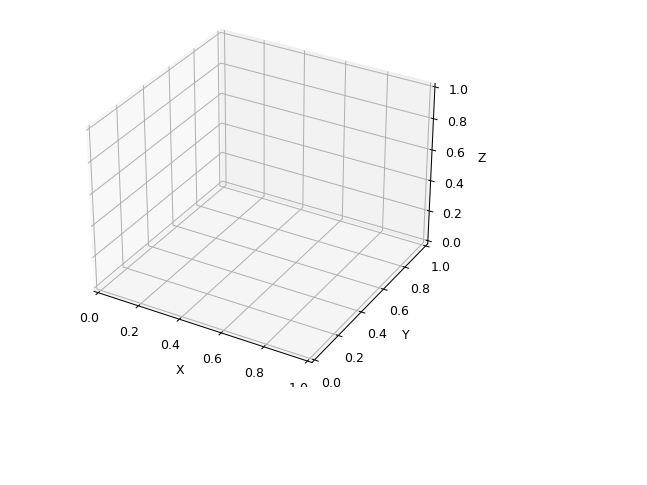

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation

# Fixing random state for reproducibility
np.random.seed(19680801)


def Gen_RandLine(length, dims=2):
    """
    Create a line using a random walk algorithm

    length is the number of points for the line.
    dims is the number of dimensions the line has.
    """
    lineData = np.empty((dims, length))
    lineData[:, 0] = np.random.rand(dims)
    for index in range(1, length):
        # scaling the random numbers by 0.1 so
        # movement is small compared to position.
        # subtraction by 0.5 is to change the range to [-0.5, 0.5]
        # to allow a line to move backwards.
        step = ((np.random.rand(dims) - 0.5) * 0.1)
        lineData[:, index] = lineData[:, index - 1] + step

    return lineData


def update_lines(num, dataLines, lines):
    for line, data in zip(lines, dataLines):
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_data(data[0:2, :num])
        line.set_3d_properties(data[2, :num])
    return lines

# Attaching 3D axis to the figure
fig = plt.figure()
ax = p3.Axes3D(fig)

# Fifty lines of random 3-D lines
data = [Gen_RandLine(25, 3) for index in range(50)]

# Creating fifty line objects.
# NOTE: Can't pass empty arrays into 3d version of plot()
lines = [ax.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1])[0] for dat in data]

# Setting the axes properties
ax.set_xlim3d([0.0, 1.0])
ax.set_xlabel('X')

ax.set_ylim3d([0.0, 1.0])
ax.set_ylabel('Y')

ax.set_zlim3d([0.0, 1.0])
ax.set_zlabel('Z')

ax.set_title('3D Test')

# Creating the Animation object
line_ani = animation.FuncAnimation(fig, update_lines, 25, fargs=(data, lines),
                                   interval=50, blit=False)

plt.show()